# Tensorflow

- TensorFlow is an open-source library developed by Google specifically for Deep Learning.
- uses a dedicated data type `Tensor`, that can be used directly in the construction and training of neural networks. Tensors in TensorFlow are the fundamental data structure used for representing multi-dimensional arrays.
- TensorFlow has robust support for GPU acceleration, making it efficient for training deep learning models on GPUs.

## Installation

https://www.tensorflow.org/install/pip#linux


In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.13.0


### Check GPU support
https://www.tensorflow.org/api_docs/python/tf/test/is_gpu_available

In [3]:
# Lists available GPUs for TensorFlow
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Checks if TensorFlow can access the GPU
gpu_available = len(tf.config.list_physical_devices('GPU')) > 0
print("Is a GPU available:", gpu_available)

Available GPUs: []
Is a GPU available: False


In [4]:
# Display the keys in the TensorFlow build information
tf_build_info_keys = tf.sysconfig.get_build_info().keys()
print(tf_build_info_keys)

odict_keys(['is_cuda_build', 'is_rocm_build', 'is_tensorrt_build'])


In [5]:
# Prints True if TensorFlow was built with CUDA (GPU support), False otherwise.
# print(tf.sysconfig.get_build_info()["cuda_version"] != "")

In [6]:
tf.test.is_built_with_cuda()

False

In [7]:
tf.config.list_physical_devices('GPU')

[]

# colab: https://colab.research.google.com/drive/1BhKRmnAx4KZsXazfl1oJ-NN7p1XYfUz9?hl=de#scrollTo=U_J4oYII3dMa

## Tensor: Constant vs. Variable

- `tf.constant`/`tf.Tensor`: Constants are immutable, meaning their values cannot be changed after creation. Once you create a constant tensor, its value remains fixed throughout the execution of the program. Use them for example, if you have hyperparameters or fixed values that need to remain constant throughout the training process.
- `tf.Variable`: Variables are mutable, and their values can be changed during the execution of the program. This makes variables suitable for situations where you need to update the values iteratively, such as in training neural network weights. Use variables when you want to represent trainable parameters in your model, like weights and biases in a neural network.

In [8]:
x1 = tf.constant([[1.0, 2.0]], dtype=np.float16)
x1

<tf.Tensor: shape=(1, 2), dtype=float16, numpy=array([[1., 2.]], dtype=float16)>

In [9]:
x1.numpy()

array([[1., 2.]], dtype=float16)

In [10]:
x1[0]

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1., 2.], dtype=float16)>

In [11]:
x1[0][0]

<tf.Tensor: shape=(), dtype=float16, numpy=1.0>

In [12]:
y1 = tf.convert_to_tensor([[2.0], [3.0]])
y1.numpy()

array([[2.],
       [3.]], dtype=float32)

In [13]:
b1 = tf.constant(4.0)
b1

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [14]:
b1 = tf.Variable(4.0)
b1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

In [15]:
import tensorflow as tf

# Using tf.constant
constant_tensor = tf.constant([1, 2, 3])

# Using tf.Variable
variable_tensor = tf.Variable([1, 2, 3])

# You can update the value of a tf.Variable
variable_tensor.assign([4, 5, 6])

# Accessing the values
print(constant_tensor.numpy())  # Output: [1 2 3]
print(variable_tensor.numpy())  # Output: [4 5 6]


[1 2 3]
[4 5 6]


## Eager vs. Graph execution / Інтерактивне (послідовне) виконання проти Графічного виконання

https://www.tensorflow.org/guide/intro_to_graphs


In [16]:
# https://www.tensorflow.org/api_docs/python/tf/executing_eagerly
# Default
assert tf.multiply(6, 7).numpy() == 42
tf.executing_eagerly()

True

In [17]:
# Simple Python function
def fn():
    print("Eager execution in a simple Python function:", tf.executing_eagerly())
    return tf.multiply(6, 7).numpy()


fn()

Eager execution in a simple Python function: True


42

In [18]:
tf.config.run_functions_eagerly(False)  # Default behaviour


@tf.function  # Compiles a function into a callable TensorFlow graph (https://www.tensorflow.org/api_docs/python/tf/function)
def fn_graph():
    with tf.init_scope():  # context manager, moves clause out of the graph
        print("Eager execution outside of the graph:", tf.executing_eagerly())  # outside of the graph
    print("Eager execution inside of the graph:", tf.executing_eagerly())  # inside of the graph
    return tf.multiply(6, 7)  #.numpy()


fn_graph().numpy()

Eager execution outside of the graph: True
Eager execution inside of the graph: False


42

In [19]:
fn_graph()

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [20]:
tf.config.run_functions_eagerly(True)


@tf.function  # Compiles a function into a callable TensorFlow graph (https://www.tensorflow.org/api_docs/python/tf/function)
def fn_eager():
    with tf.init_scope():  # context manager, moves clause out of the graph
        print("Eager execution outside of the graph:", tf.executing_eagerly())  # outside of the graph
    print("Eager execution inside of the graph:", tf.executing_eagerly())  # inside of the graph
    return tf.multiply(6, 7).numpy()


fn_eager()

Eager execution outside of the graph: True
Eager execution inside of the graph: True


42

In [21]:
# fn_eager().graph()

In [22]:
# Switch to graph execution by default
# tf.compat.v1.disable_eager_execution()

In [23]:
def fn():
    print("Eager execution in a simple Python function:", tf.executing_eagerly())


fn()

Eager execution in a simple Python function: True


In [24]:
# tf.compat.v1.enable_eager_execution()
# 
# 
# def fn():
#     print("Eager execution in a simple Python function:", tf.executing_eagerly())
# 
# 
# fn()

# Eager execution cannot be enabled after TensorFlow APIs have been used to
# create or execute graphs. It is typically recommended to invoke this function
# at program startup and not in a library (as most libraries should be usable
# both with and without eager execution).

*When to choose what?*

__Eager__ execution:
- if you are experimenting and debugging is important
- if you have *a few* computationally *expensive* operations

__Graph__ execution:
- If you need to optimize your code when you have *many operations* which are in itself not necessarily heavy

*Good practice*:
- use `@tf.function` decorator to define your functions and switch on the option `tf.config.run_functions_eagerly(True)` when debugging to be able to turn it to `False` otherwise if needed.

## Computational graph / обчислювальний граф

https://www.tensorflow.org/guide/intro_to_graphs

In [25]:
def formula(x: tf.Tensor, y: tf.Tensor, b: tf.Tensor):
    x = tf.matmul(x, y)
    x = x + b
    return x


function_that_uses_a_graph = tf.function(formula)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = formula(x1, y1, b1).numpy()
tf_function_value = function_that_uses_a_graph(x1, y1, b1).numpy()

orig_value == tf_function_value

array([[ True]])

In [26]:
def my_func(x, y):
    # A simple hand-rolled layer.
    return tf.nn.relu(tf.matmul(x, y))


my_func_tf = tf.function(my_func)

my_func_tf(x=x1, y=y1).numpy()

array([[8.]], dtype=float32)

In [27]:
# This is the graph-generating output of AutoGraph.
print(tf.autograph.to_code(my_func_tf.python_function))

def tf__my_func(x, y):
    with ag__.FunctionScope('my_func', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.converted_call(ag__.ld(tf).nn.relu, (ag__.converted_call(ag__.ld(tf).matmul, (ag__.ld(x), ag__.ld(y)), None, fscope),), None, fscope)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)


In [28]:
# This is the graph itself.
print(my_func_tf.get_concrete_function(x1, y1).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: 1
        }
        dim {
          size: 2
        }
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
}
node {
  name: "y"
  op: "Placeholder"
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: 2
        }
        dim {
          size: 1
        }
      }
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "_user_specified_name"
    value {
      s: "y"
    }
  }
}
node {
  name: "MatMul"
  op: "MatMul"
  input: "x"
  input: "y"
  attr {
    key: "transpose_b"
    value {
      b: false
    }
  }
  attr {
    key: "transpose_a"
    value {
      b: false
    }
  }
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "Relu"
  op: "Relu"
  input: "MatMu

https://www.tensorflow.org/tensorboard/graphs#graphs_of_tffunctions

In [31]:
# The function to be traced.
from datetime import datetime


# The function to be traced.
@tf.function
def my_func(x, y):
    # A simple hand-rolled layer.
    return tf.nn.relu(tf.matmul(x, y))

# Set up logging.
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

# Sample data for your function.
x = tf.random.uniform((3, 3))
y = tf.random.uniform((3, 3))

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True, profiler=True)
# Call only one tf.function when tracing.
z = my_func(x, y)
with writer.as_default():
    tf.summary.trace_export(
        name="my_func_trace",
        step=0,
        profiler_outdir=logdir)

2024-01-27 12:01:48.286622: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-01-27 12:01:48.286635: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-01-27 12:01:48.287755: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-01-27 12:01:48.287821: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


Швидкість виконання графа в TensorFlow порівняно з інтерактивним виконанням в основному залежить від наступних факторів:

- Оптимізація графа:
Під час виконання графа TensorFlow може оптимізувати та перетворювати граф обчислень перед його виконанням. Цей процес оптимізації може включати усунення спільних підвиразів, складання констант та інші оптимізації на рівні графа.
- Розміщення пристроїв та паралельне виконання:
Графічне виконання TensorFlow дозволяє ефективно розміщувати пристрої та виконувати обчислення паралельно. Граф обчислень може бути розділений на підграфи, які можуть виконуватися паралельно на кількох пристроях, таких як GPU або TPU.
- Компіляція у прискорений код:
Коли використовується графічне виконання, TensorFlow має можливість компілювати граф обчислень в більш оптимізовану форму на низькому рівні, специфічні для певного обладнання. 
- Зменшення накладень Python:
Інтерактивне виконання включає в себе виконання операцій імперативно, що означає, що кожна операція виконується негайно в Python. Це може вводити накладення Python та обмежувати можливості оптимізації. На відміну від цього, під час графічного виконання граф будується та оптимізується перед виконанням, що зменшує необхідність у частих взаємодіях із інтерпретатором Python.

In [32]:
import timeit

x = tf.random.uniform(shape=[10, 10], minval=-1, maxval=2, dtype=tf.dtypes.int32)


def power(x, y):
    result = tf.eye(10, dtype=tf.dtypes.int32)
    for _ in range(y):
        result = tf.matmul(x, result)
    return result


print("Eager execution:", timeit.timeit(lambda: power(x, 100), number=1000), "seconds")

Eager execution: 1.0112952080000923 seconds


In [33]:
power_as_graph = tf.function(power)
print("Graph execution:", timeit.timeit(lambda: power_as_graph(x, 100), number=1000), "seconds")

Graph execution: 1.0251405000000204 seconds


## Automatic differentiation / автоматичне визначення похідної

In [34]:
import tensorflow as tf


def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y = sigmoid(x)
    dydx = tape.gradient(y, x)
    print(dydx)

tf.Tensor(0.104993574, shape=(), dtype=float32)


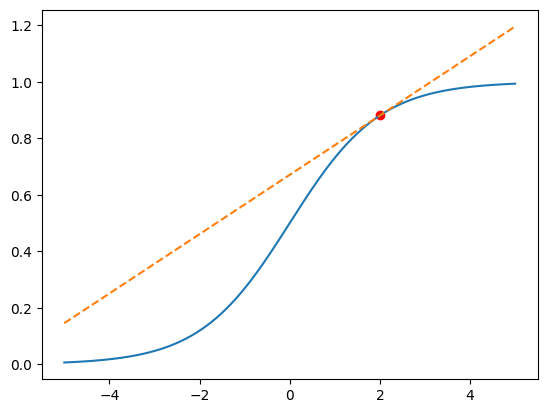

In [35]:
import matplotlib.pyplot as plt

# Define the input range
x_values = np.linspace(-5, 5, 1000)
y_values = sigmoid(x_values)

# Tangent line equation: y = f'(x) * (x - x0) + f(x0)
tangent_line = dydx * (x_values - x) + y

# Plot the function and its tangent line
plt.plot(x_values, y_values, label='Original Function')
plt.plot(x_values, tangent_line, label='Tangent Line at x={}'.format(x), linestyle='--')
plt.scatter(x, y, color='red')  # Mark the point on the function
plt.show()

## Simple Neural Network

In [36]:
import tensorflow as tf


# y = w1*x + b
# y = 5*x + 5
class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(5.0)

    def __call__(self, x):
        return self.w * x + self.b


simple_module = SimpleModule(name="simple")
simple_module(tf.constant(5.0)).numpy()

30.0

## Neural network (Perceptron / перцептрон)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Colored_neural_network_uk.svg/1280px-Colored_neural_network_uk.svg.png" alt="drawing" width="400"/>

In [37]:
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal([in_features, out_features]), name="w"
        )
        # print(self.w)
        self.b = tf.Variable(tf.zeros([out_features]), name="b")  # Trainable variables
        # print(self.b)

    def __call__(self, x):
        # y = w1*x + b
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)


# Multi-layer perceptron
class NN(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.layer_1 = DenseLayer(in_features=3, out_features=3)
        self.layer_2 = DenseLayer(in_features=3, out_features=1)

    def __call__(self, x):
        print("Input layer: ", x)
        print("Layer 1: ", "tf.nn.relu(", self.layer_1.w.numpy(), "*", x.numpy(), " + ", self.layer_1.b.numpy()), ")"
        x = self.layer_1(x)
        print("Layer 1 outputs: ", x)
        print("Layer 2: ", "tf.nn.relu(", self.layer_2.w.numpy(), "*", x.numpy(), " + ", self.layer_2.b.numpy()), ")"
        x = self.layer_2(x)
        print("Layer 2 outputs: ", x)
        return x


nn = NN(name="neural_network")

In [38]:
print("Results:", nn(tf.constant([[2.0, 2.0, 2.0]])))

Input layer:  tf.Tensor([[2. 2. 2.]], shape=(1, 3), dtype=float32)
Layer 1:  tf.nn.relu( [[ 0.24212067 -0.16959572  0.14510536]
 [-0.17459947  0.23858781 -1.252725  ]
 [ 0.71636677 -0.32764444 -0.12893905]] * [[2. 2. 2.]]  +  [0. 0. 0.]
Layer 1 outputs:  tf.Tensor([[1.567776 0.       0.      ]], shape=(1, 3), dtype=float32)
Layer 2:  tf.nn.relu( [[ 0.25429597]
 [ 1.4526603 ]
 [-0.6498747 ]] * [[1.567776 0.       0.      ]]  +  [0.]
Layer 2 outputs:  tf.Tensor([[0.3986791]], shape=(1, 1), dtype=float32)
Results: tf.Tensor([[0.3986791]], shape=(1, 1), dtype=float32)


In [39]:
# Representing activation functions in tenforflow


def identity(x):
    return x


def step(x):
    return tf.where(x > 0, 1, 0)


def sigmoid(x):
    return tf.math.sigmoid(x)


def tanh(x):
    return tf.math.tanh(x)


def arctan(x):
    return tf.math.atan(x)


def relu(x):
    return tf.nn.relu(x)


def prelu(x, alpha=0.1):
    return tf.maximum(0.0, x) + alpha * tf.minimum(0.0, x)


def softsign(x):
    return x / (1 + tf.abs(x))

## Linear Model

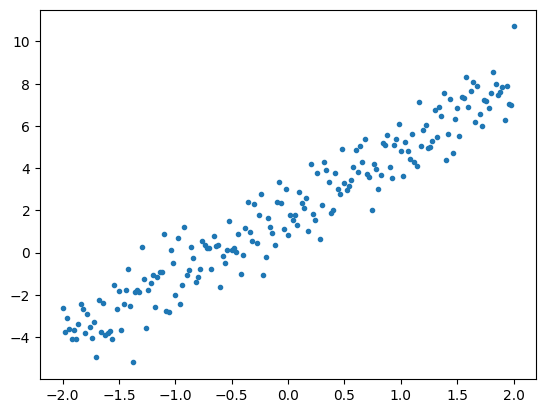

In [40]:
import tensorflow as tf

import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)


def f(x):
    return x * TRUE_W + TRUE_B


# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

# Plot all the data
plt.plot(x, y, '.')
plt.show()

In [41]:
import tensorflow as tf


# Module: https://www.tensorflow.org/api_docs/python/tf/Module
class LinearModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be randomly initialized
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b


model = LinearModel()
# List the variables tf.modules's built-in variable aggregation.
print("Weights and Biases:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Weights and Biases: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [42]:
def loss(target_y, predicted_y):  # середньоквадратична помилка
    return tf.reduce_mean(tf.square(target_y - predicted_y))


def train(model, x, y, learning_rate):
    # backpropagation
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))
        dw, db = t.gradient(current_loss, [model.w, model.b])
        model.w.assign_sub(learning_rate * dw)
        model.b.assign_sub(learning_rate * db)


def training_loop(model, x, y):
    for epoch in range(10):
        train(model, x, y, learning_rate=0.1)
        current_loss = loss(y, model(x))
        print(f"loss: {current_loss}")

In [43]:
linear_model = LinearModel()
training_loop(linear_model, x, y)

loss: 6.197547435760498
loss: 3.99750018119812
loss: 2.731400966644287
loss: 1.9968703985214233
loss: 1.5672239065170288
loss: 1.3138471841812134
loss: 1.1632161140441895
loss: 1.0729676485061646
loss: 1.018494963645935
loss: 0.9853869676589966


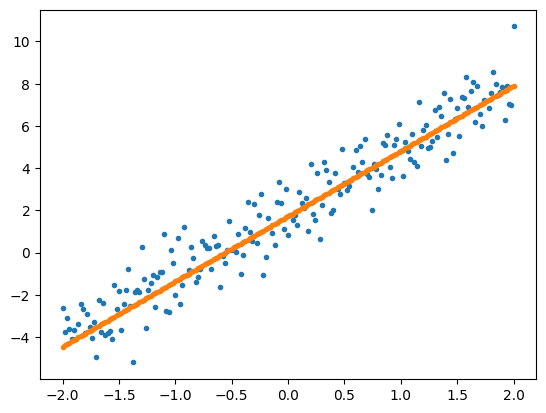

In [44]:
y_pred = linear_model(x)
# Plot all the data
plt.plot(x, y, '.')
plt.plot(x, y_pred, '.')

plt.show()

# Pytorch

In [46]:
import torch

In [47]:
torch.cuda.is_available()

False

In [48]:


# Using torch.tensor (similar to tf.constant)
constant_tensor = torch.tensor([1, 2, 3])

# Using torch.nn.Parameter (similar to tf.Variable)
variable_tensor = torch.nn.Parameter(torch.tensor([1, 2, 3], dtype=torch.float32))

# If you want to create a regular tensor (not a parameter) with requires_grad=True
variable_tensor_non_param = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)

# Print the tensors
print("Constant Tensor:", constant_tensor)
print("Variable Tensor (Parameter):", variable_tensor)
print("Variable Tensor (non-Parameter):", variable_tensor_non_param)


Constant Tensor: tensor([1, 2, 3])
Variable Tensor (Parameter): Parameter containing:
tensor([1., 2., 3.], requires_grad=True)
Variable Tensor (non-Parameter): tensor([1., 2., 3.], requires_grad=True)


In [49]:

import torch.nn as nn


class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be randomly initialized
        self.w = nn.Parameter(torch.tensor(5.0, dtype=torch.float32))
        self.b = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))

    def forward(self, x):
        return self.w * x + self.b


def loss(target_y, predicted_y):  # Mean Squared Error
    return torch.mean((target_y - predicted_y) ** 2)


def train(model, x, y, learning_rate):
    # Backpropagation, good explanation: https://medium.com/@mugeshk/backpropagation-algorithm-using-pytorch-ee1287888aca
    current_loss = loss(y, model(x))
    model.zero_grad()
    current_loss.backward()  # https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html

    with torch.no_grad():
        model.w -= learning_rate * model.w.grad
        model.b -= learning_rate * model.b.grad


def training_loop(model, x, y):
    for epoch in range(10):
        train(model, x, y, learning_rate=0.1)
        current_loss = loss(y, model(x))
        print(f"loss: {current_loss.item()}")

# Please note that PyTorch uses dynamic computation graphs, so there's no need for a separate GradientTape as in TensorFlow. 
# The gradients are automatically calculated during the backward pass. 
# Also, the loss function and the training loop have been adjusted to use PyTorch syntax.

loss: 6.66106653213501
loss: 4.3346171379089355
loss: 2.991436243057251
loss: 2.209610939025879
loss: 1.7507833242416382
loss: 1.479311466217041
loss: 1.3174092769622803
loss: 1.2201133966445923
loss: 1.161218285560608
loss: 1.125327229499817


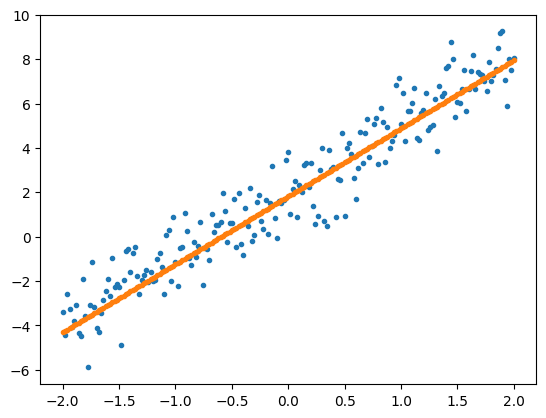

In [50]:
# Example usage

# A vector of random x values
NUM_EXAMPLES = 201
x = torch.linspace(-2, 2, steps=NUM_EXAMPLES, dtype=torch.float32)

# Generate some noise
noise = torch.randn(NUM_EXAMPLES)

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0


def f(x):
    return x * TRUE_W + TRUE_B


# Calculate y
y = f(x) + noise

# instantiate the model
linear_model = LinearModel()
training_loop(linear_model, x, y)
y_pred = linear_model(x)
# Plot all the data
plt.plot(x, y, '.')
plt.plot(x, y_pred.detach().numpy(), '.')  # tensor.detach().numpy()

plt.show()

## Which framework to use? 
PyTorch and TensorFlow are two of the most popular deep learning frameworks, and while they share many similarities, there are some key differences between them:

**Dynamic vs. Static Computational Graph:**

- PyTorch: PyTorch uses a dynamic computational graph. This means that the graph is built on-the-fly as operations are executed. It allows for more flexibility and ease of debugging.
- TensorFlow: TensorFlow traditionally used a static computational graph. However, with the introduction of TensorFlow 2.x, eager execution became the default mode, providing a dynamic graph similar to PyTorch. TensorFlow 2.x allows users to switch between static and dynamic graphs.

**API Style:**
- PyTorch: PyTorch uses a more imperative and Pythonic syntax. It is often considered more intuitive and easier to learn for researchers and beginners.
- TensorFlow: TensorFlow has a more declarative and somewhat more verbose syntax. However, TensorFlow 2.x with eager execution is more similar to PyTorch in terms of syntax.
  
**Community and Adoption:**
- PyTorch: PyTorch gained popularity in the research community, and many researchers appreciate its dynamic graph and ease of use. It is often the preferred choice for prototyping and experimentation.
- TensorFlow: TensorFlow has been widely adopted in both research and industry. Its static graph mode was historically favored in production settings, and TensorFlow's ecosystem includes many tools for deploying models at scale.

**Visualization Tools:**
- PyTorch: PyTorch's models can also be visualized in TensorBoard.
- TensorFlow: TensorFlow has TensorBoard, which is a powerful visualization tool for monitoring and debugging models during training. It includes features for graph visualization, loss curves, and more.

**Ecosystem and Integration:**
- PyTorch: PyTorch has a more concise and modular ecosystem. It is often praised for its ease of integration with other libraries and tools.
- TensorFlow: TensorFlow has a more extensive ecosystem, including TensorFlow Extended (TFX) for end-to-end machine learning pipelines. It is well-integrated with TensorFlow Lite for mobile and edge devices.

**Automatic Differentiation:**
- PyTorch: PyTorch uses dynamic computation for automatic differentiation, making it easy to compute gradients of complex operations on-the-fly.
- TensorFlow: TensorFlow's eager execution mode and TensorFlow 2.x make automatic differentiation more similar to PyTorch.

Additional information: https://www.datacamp.com/tutorial/pytorch-vs-tensorflow-vs-keras